# Assignment_6_a 

In [2]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import os

import logging
logging.getLogger('tensorflow').disabled = True

def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [3]:
import tensorflow as tf

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print (X_train.shape)
print (X_test.shape)

(60000, 784)
(10000, 784)


Training data shape (60000, 784)


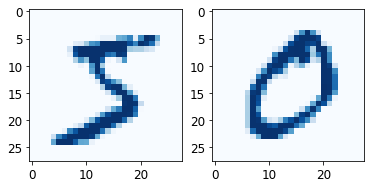

In [6]:
print('Training data shape', X_train.shape)
_, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(X_train[0].reshape(28, 28), cmap=plt.cm.Blues);
ax2.imshow(X_train[1].reshape(28, 28), cmap=plt.cm.Blues);

### First model with 2 layers and 10 Neurons for each layer

In [7]:
%%time
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]

dnn_clf_2a = tf.estimator.DNNClassifier(hidden_units=[10,10], n_classes=10,feature_columns=feature_cols)


#input_fn_2a = tf.estimator.inputs.numpy_input_fn(x={"X": X_train}, y=y_train, num_epochs=50, batch_size=50, shuffle=True)
input_fn_2a = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"X": X_train}, y=y_train, num_epochs=50, batch_size=50, shuffle=True)

dnn_clf_2a.train(input_fn=input_fn_2a)

CPU times: user 2min 20s, sys: 9.33 s, total: 2min 29s
Wall time: 1min 38s


In [8]:
train_2a_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train_2a = dnn_clf_2a.evaluate(input_fn=train_2a_input_fn)
eval_results_train_2a

{'accuracy': 0.86911666,
 'average_loss': 0.48962054,
 'global_step': 60000,
 'loss': 0.48963997}

In [9]:
test_2a_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test_2a = dnn_clf_2a.evaluate(input_fn=test_2a_input_fn)
eval_results_test_2a

{'accuracy': 0.872,
 'average_loss': 0.47321466,
 'global_step': 60000,
 'loss': 0.4723797}

## The first model took 98 seconds for build time and 87 seconds for both train and test accuracy.  

# Assignment_6_b

# Second model with 2 layers and many Neurons for each layer

In [12]:
%%time

feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]

dnn_clf_2b = tf.compat.v1.estimator.DNNClassifier(hidden_units=[150,50], n_classes=10,feature_columns=feature_cols)

input_fn_2b = tf.compat.v1.estimator.inputs.numpy_input_fn( x={"X": X_train}, y=y_train, num_epochs=50, batch_size=50, shuffle=True)

dnn_clf_2b.train(input_fn=input_fn_2b)



CPU times: user 3min 51s, sys: 13.8 s, total: 4min 5s
Wall time: 2min 38s


In [17]:
train_2b_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train_2b = dnn_clf_2a.evaluate(input_fn=train_2b_input_fn)
eval_results_train_2b

{'accuracy': 0.86911666,
 'average_loss': 0.48962054,
 'global_step': 60000,
 'loss': 0.48963997}

In [18]:
test_2b_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test_2b = dnn_clf_2b.evaluate(input_fn=test_2a_input_fn)
eval_results_test_2b


{'accuracy': 0.9772,
 'average_loss': 0.11653095,
 'global_step': 60000,
 'loss': 14.750752}

## The Second model took 158 seconds for build time and 87 for training accuracy and 98 seconds for testing accuracy.  

# Assignment 6c

# The Third model with 5 layers with 20 neurons for each layer

In [21]:
%%time

feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]

dnn_clf_5a = tf.compat.v1.estimator.DNNClassifier(hidden_units=[20,20,20,20,20], n_classes=10,feature_columns=feature_cols)

input_fn_5a = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"X": X_train}, y=y_train, num_epochs=50, batch_size=50, shuffle=True)

dnn_clf_5a.train(input_fn=input_fn_5a)

CPU times: user 2min 35s, sys: 8.14 s, total: 2min 43s
Wall time: 1min 44s


In [22]:
train_5a_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train_5a = dnn_clf_5a.evaluate(input_fn=train_5a_input_fn)
eval_results_train_5a

{'accuracy': 0.9784167,
 'average_loss': 0.07402981,
 'global_step': 60000,
 'loss': 9.470764}

In [23]:
test_5a_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test_5a = dnn_clf_5a.evaluate(input_fn=test_5a_input_fn)
eval_results_test_5a

{'accuracy': 0.9546,
 'average_loss': 0.18325506,
 'global_step': 60000,
 'loss': 23.196844}

## The Third model took 104 seconds for build time and 0.98 for training accuracy with 0.95 seconds for testing accuracy.

# Assignment 6d

# The fourth model with 5 layers with mixed Neurons for each layer.

In [24]:
%%time

feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]

dnn_clf_5b = tf.compat.v1.estimator.DNNClassifier(hidden_units=[300,200,100,50,25], n_classes=10,feature_columns=feature_cols)

input_fn_5b = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"X": X_train}, y=y_train, num_epochs=50, batch_size=50, shuffle=True)

dnn_clf_5b.train(input_fn=input_fn_5b)

CPU times: user 7min 25s, sys: 25.2 s, total: 7min 50s
Wall time: 5min 13s


In [25]:
train_5b_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"X": X_train}, y=y_train, shuffle=False)
eval_results_train_5b = dnn_clf_5b.evaluate(input_fn=train_5b_input_fn)
eval_results_train_5b

{'accuracy': 1.0,
 'average_loss': 3.8022543e-05,
 'global_step': 60000,
 'loss': 0.0048642913}

In [26]:
test_5b_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"X": X_test}, y=y_test, shuffle=False)
eval_results_test_5b = dnn_clf_5b.evaluate(input_fn=test_5b_input_fn)
eval_results_test_5b

{'accuracy': 0.9762,
 'average_loss': 0.21508543,
 'global_step': 60000,
 'loss': 27.226004}

## The fourth model took 313 seconds for build time and 1.0 training accuracy with 0.98 testing accuracy.

# The conclusion is the fourth model because the accuracy is the highest at the expense of time.  More layers from 2 to 5 improve accuracy with more time.